In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
%matplotlib inline

In [2]:
train_dt = pd.read_csv('./input/train.csv',index_col=0)
test_dt = pd.read_csv('./input/test.csv',index_col=0)

In [3]:
print(train_dt.head())

    MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
Id                                                                    
1           60       RL         65.0     8450   Pave   NaN      Reg   
2           20       RL         80.0     9600   Pave   NaN      Reg   
3           60       RL         68.0    11250   Pave   NaN      IR1   
4           70       RL         60.0     9550   Pave   NaN      IR1   
5           60       RL         84.0    14260   Pave   NaN      IR1   

   LandContour Utilities LotConfig    ...     PoolArea PoolQC Fence  \
Id                                    ...                             
1          Lvl    AllPub    Inside    ...            0    NaN   NaN   
2          Lvl    AllPub       FR2    ...            0    NaN   NaN   
3          Lvl    AllPub    Inside    ...            0    NaN   NaN   
4          Lvl    AllPub    Corner    ...            0    NaN   NaN   
5          Lvl    AllPub       FR2    ...            0    NaN   NaN   

   M

In [4]:
train_dt.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [5]:
# 
price = pd.DataFrame({
    "price":train_dt['SalePrice'],'log(pric+1)':np.log1p(train_dt['SalePrice'])#
})
# log => exp  log1p=>expm1

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f326c708550>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f3264520e48>]], dtype=object)

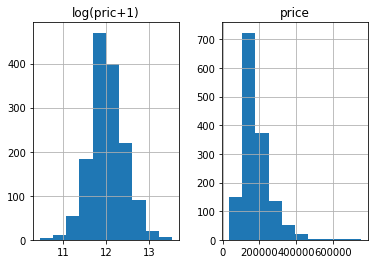

In [6]:
# 
price.hist()

In [7]:
#去掉SalePrice列，因为test set没有这一列  ,把输出的数值平滑处理
y_train = np.log1p(train_dt.pop('SalePrice')) 

In [8]:
all_dt = pd.concat((train_dt,test_dt),axis=0)

In [9]:
all_dt.shape

(2919, 79)

In [10]:
# 特征工程

In [11]:
all_dt.tail()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal
2919,60,RL,74.0,9627,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,11,2006,WD,Normal


In [12]:
# MSSubClass:类似房子级别 应该是分类 见文件
all_dt['MSSubClass'].dtypes

dtype('int64')

In [13]:
all_dt['MSSubClass'] = all_dt['MSSubClass'].astype('str')

In [14]:
all_dt['MSSubClass'].value_counts()

20     1079
60      575
50      287
120     182
30      139
160     128
70      128
80      118
90      109
190      61
85       48
75       23
45       18
180      17
40        6
150       1
Name: MSSubClass, dtype: int64

In [15]:
# 把分类变量转换为onehot格式
test = pd.get_dummies(all_dt['MSSubClass'],prefix='MSSubClass')

In [16]:
alldd  =   all_dt


In [17]:
# 这里自动把列拓展成one hot 形式
all_dummy_dt = pd.get_dummies(all_dt)
print(all_dummy_dt.head())  #这时已经变成了303列的数据

    LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
Id                                                                            
1          65.0     8450            7            5       2003          2003   
2          80.0     9600            6            8       1976          1976   
3          68.0    11250            7            5       2001          2002   
4          60.0     9550            7            5       1915          1970   
5          84.0    14260            8            5       2000          2000   

    MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF          ...            \
Id                                                         ...             
1        196.0       706.0         0.0      150.0          ...             
2          0.0       978.0         0.0      284.0          ...             
3        162.0       486.0         0.0      434.0          ...             
4          0.0       216.0         0.0      540.0          ...    

In [18]:
# 分类数据处理好了，现在处理numerical的数据

In [19]:
# 数据缺失
all_dummy_dt.isnull().sum().sort_values(ascending=False).head()
# 可以看到缺失数据的列分布 下面来具体研究

LotFrontage     486
GarageYrBlt     159
MasVnrArea       23
BsmtHalfBath      2
BsmtFullBath      2
dtype: int64

In [20]:
# 查看每个列的平均值
# mean_cols = all_dummy_dt.mean().sort_values(ascending=False).head(10)
mean_cols = all_dummy_dt.mean()
mean_cols.sort_values(ascending=False).head()
# print(mean_cols.head(10))

LotArea         10168.114080
YrSold           2007.792737
YearRemodAdd     1984.264474
GarageYrBlt      1978.113406
YearBuilt        1971.312778
dtype: float64

In [21]:
# all_dummy_dt = all_dummy_dt.fillna(mean_cols)
# print(mean_cols['LotFrontage'])
all_dummy_dt['MasVnrArea'] = all_dummy_dt['MasVnrArea'].fillna(mean_cols['MasVnrArea'])

In [22]:
all_dummy_dt.isnull().sum().sort_values(ascending=False).head()

LotFrontage     486
GarageYrBlt     159
BsmtHalfBath      2
BsmtFullBath      2
BsmtFinSF2        1
dtype: int64

In [23]:
all_dummy_dt = all_dummy_dt.fillna(mean_cols)

In [24]:
# 标准化numerical数据

In [25]:
all_dummy_dt.isnull().sum().sort_values(ascending=False).head()

SaleCondition_Partial    0
Neighborhood_NridgHt     0
Neighborhood_SWISU       0
Neighborhood_Sawyer      0
Neighborhood_SawyerW     0
dtype: int64

In [26]:
# 现找到numerical的数据


In [27]:
numerical_cols = all_dt.columns[all_dt.dtypes!='object']
numerical_cols

Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')

In [28]:
# 计算标准分布：（X-X'）/S  让数据点更平滑，更便于计算 （也可以使用log1p）

In [29]:
# 这里转化为正态分布
numerical_col_means = all_dummy_dt.loc[:,numerical_cols].mean()
numerical_col_std = all_dummy_dt.loc[:,numerical_cols].std()
all_dummy_dt.loc[:,numerical_cols] = (all_dummy_dt.loc[:,numerical_cols]-numerical_col_means)/numerical_col_std

In [129]:
# all_dummy_dt['BsmtFullBath'].hist()

## 4.建立模型

In [30]:
# 训练分成训练和测试集

In [31]:
dummy_train_dt = all_dummy_dt.loc[train_dt.index]
dummy_test_dt = all_dummy_dt.loc[test_dt.index]

In [32]:
dummy_train_dt.shape , dummy_test_dt.shape

((1460, 303), (1459, 303))

In [33]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

In [34]:
# Ridge Regression 岭回归 是一种专用于共线性数据分析的有偏估计回归方法，类似一种改良的最小二乘估计法
# 针对比较多特征进行无脑拟合

In [35]:
# 转化为numpy array的格式
X_train = dummy_train_dt.values
X_test = dummy_test_dt.values
print(type(X_test))

<class 'numpy.ndarray'>


In [36]:
# 交叉验证(训练集中)
alphas = np.logspace(-3,2,50) # 50^-3  ~  50^2
test_scores = []
# sqrt 平方根
for alpha in alphas:
    clf = Ridge(alpha)
    # 均方差回归损失
    test_score = np.sqrt(-cross_val_score(clf,X_train,y_train,cv=10,scoring='neg_mean_squared_error'))
    #这里也可以用grid search
    test_scores.append(np.mean(test_score))

在alpha10-20时达到最优的一个结果，均方差最小

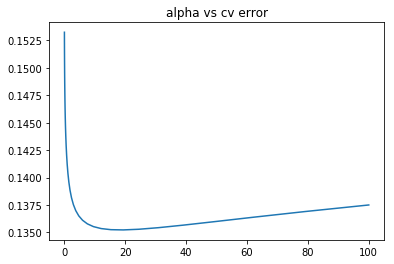

In [37]:
plt.plot(alphas,test_scores)
plt.title('alpha vs cv error')

### 下面用随机森林
这里的随机森林是用来做回归的

In [38]:
from sklearn.ensemble import RandomForestRegressor

In [39]:
max_features = [.1,.3,.5,.7,.9,.99]
test_scores = []
for max_feat in max_features:
    clf = RandomForestRegressor(n_estimators=200,max_features=max_feat)
    test_score = np.sqrt(-cross_val_score(clf,X_train,y_train,cv=10,scoring='neg_mean_squared_error'))
    test_scores.append(np.mean(test_score))
    

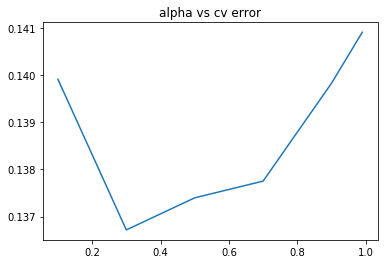

In [40]:
plt.plot(max_features,test_scores)
plt.title('alpha vs cv error')

可以看出，参数选择总占比0.3左右比较好

### 下面进行模型的集成 - 2


In [44]:
# 先建立好ridge model
ridge = Ridge(alpha=15)
rf = RandomForestRegressor(n_estimators=500,max_features=.3)

## Bagging
把很多的小分类器放到一起，每个train随机的一部分数据，然后把输出综合起来

In [43]:
# BaggingRegressor处理回归，BaggingClassifier
from sklearn.ensemble import BaggingRegressor
from sklearn.model_selection import cross_val_score

这里我们用CV结果来测试分类器个数对最后结果的影响
部署Bagging的时候，要把它的函数base_estimator里填上你的小分类器(ridge)

In [47]:
params = [1,10,15,20,25,30,40]
test_scores = []
for param in params:
    clf = BaggingRegressor(n_estimators=param,base_estimator=ridge)
    test_score = np.sqrt(- cross_val_score(clf,X_train,y_train,cv=10,scoring='neg_mean_squared_error'))
    test_scores.append(np.mean(test_score))

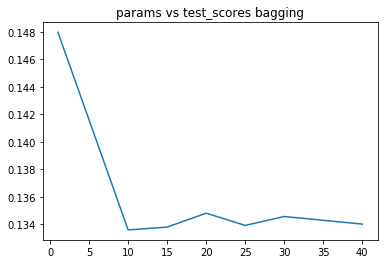

In [48]:
plt.plot(params,test_scores)
plt.title('params vs test_scores bagging')

可见，取20个左右分类器的时候效果最好

也可以不用ridge, bagging的默认base_estimator是DecisionTree模型

In [51]:
params = [10,15,20,25,30,35,40,50,60,70,100]
test_scores = []
for param in params:
    clf = BaggingRegressor(n_estimators=param)
    test_score = np.sqrt(- cross_val_score(clf,X_train,y_train,
                                           cv=10,scoring='neg_mean_squared_error'))
    test_scores.append(np.mean(test_score))

可见不如用ridge模型效果好

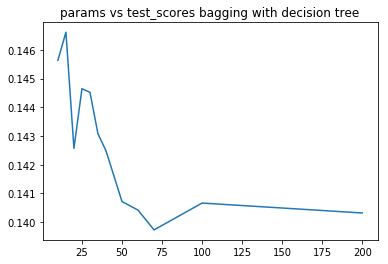

In [52]:
plt.plot(params,test_scores)
plt.title('params vs test_scores bagging with decision tree')

## Boosting
它是拿来一堆分类器，然后线性排列，下一个分类器把上一个分类器做的不好的地方加上更高的权重，这样依次学下去

In [54]:
from sklearn.ensemble import AdaBoostRegressor

In [57]:
params = [10,15,20,25,30,35,40,50]
test_scores = []
for param in params:
    clf = AdaBoostRegressor(n_estimators=param,base_estimator=ridge)
    test_score = np.sqrt(- cross_val_score(clf,X_train,y_train,
                                           cv=10,scoring='neg_mean_squared_error'))
    test_scores.append(np.mean(test_score))

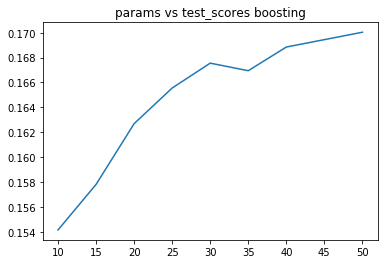

In [58]:
plt.plot(params,test_scores)
plt.title('params vs test_scores boosting')

## XGBoost
kaggle神器

In [59]:
from xgboost import XGBRegressor

In [61]:
params = [1,2,3,4,5,6]
test_scores = [];
for param in params:
    clf = XGBRegressor(max_depth=param)
    test_score = np.sqrt(- cross_val_score(clf,X_train,y_train,
                                           cv=10,scoring='neg_mean_squared_error'))
    test_scores.append(np.mean(test_score))

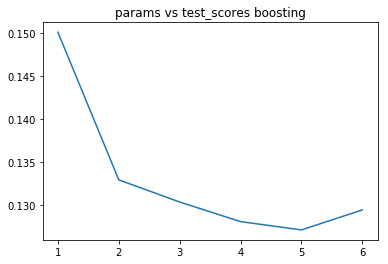

In [62]:
plt.plot(params,test_scores)
plt.title('params vs test_scores boosting')

## 牛逼不？

In [53]:
### 上面给label做了一个log1p的操作，这里要把这样预测值再转换回来